In [ ]:
# pip install ISLP

In [18]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import confusion_table, load_data

In [2]:
from sklearn.svm import SVC # this is support vector classifer to use svms
from ISLP.svm import plot # helps in plottings the smv models

In [3]:
data = load_data('Auto')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
median_val = np.median(data['mpg'])
y = np.where(data['mpg'] < median_val, 0, 1)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
np.sum(y == 0) , np.sum(y == 1)

(196, 196)

In [11]:
data.drop('mpg' , axis=1 , inplace=True)

In [13]:
data.drop('name' , axis=1 , inplace=True)

In [31]:
(39+32)/(39+32+6+2)

0.8987341772151899

Truth       0   1
Predicted        
0          39   6
1           2  32


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


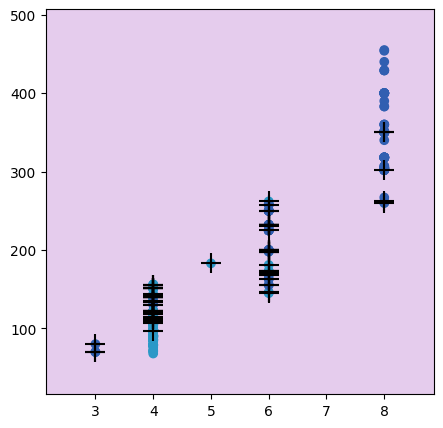

In [29]:
X_train,X_test,y_train,y_test = skm.train_test_split(data, y, test_size=0.2)

linear_model = SVC(kernel='rbf' , C=5) # create model(radial this time) for svc, if we increase c region shrinks and vice  , if c values is low the model consider only 1 feature
linear_model.fit(X_train,y_train) # train the model
y_pred = linear_model.predict(X_test) # get some predictions
print(confusion_table(y_pred , y_test)) # ct for this

fig, ax = subplots(figsize=(5,5))
plot(X_train,y_train,linear_model,ax=ax)

Truth       0   1
Predicted        
0          39   3
1           2  35


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


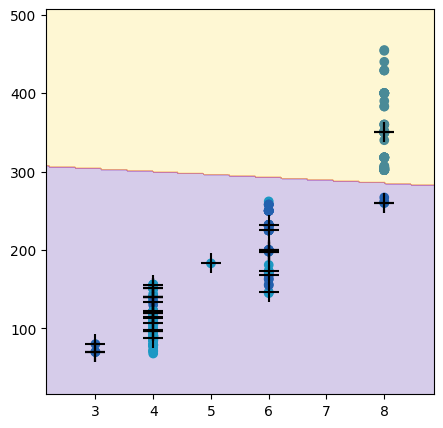

In [30]:

rad_model = SVC(kernel='linear' , C=5) # create model(radial this time) for svc, if we increase c region shrinks and vice  , if c values is low the model consider only 1 feature
rad_model.fit(X_train,y_train) # train the model
y_pred = rad_model.predict(X_test) # get some predictions
print(confusion_table(y_pred , y_test)) # ct for this

fig, ax = subplots(figsize=(5,5))
plot(X_train,y_train,rad_model,ax=ax)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


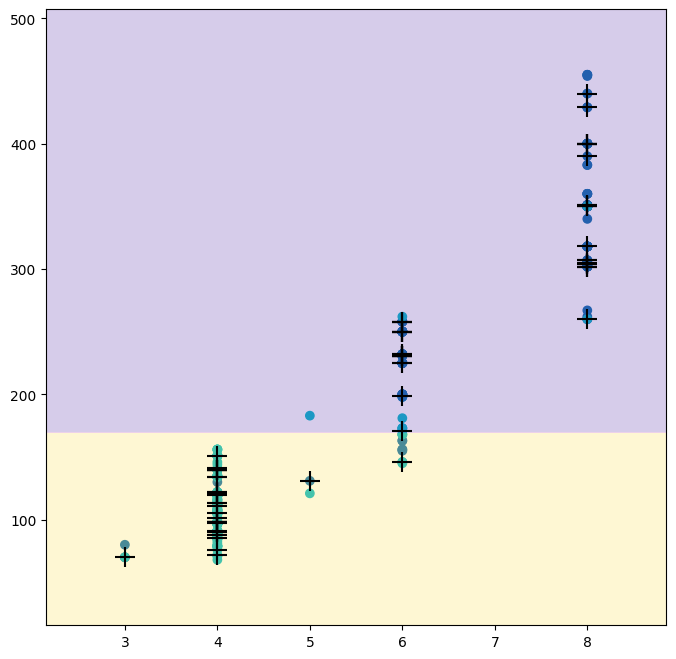

In [19]:
from ISLP.svm import plot as plot_svm
fig, ax = subplots(figsize=(8,8))
plot_svm(data,
         y,
         rad_model,
         scatter_cmap=cm.tab10,
         ax=ax)